In [1]:
from pathlib import Path
import glob
import statistics as st


aq = Path('OC-Modulo3/')

ar = glob.glob('*.txt')

a = 0

var = []

valores = []
desvio = []

for i in range(len(ar)):
    aqr = open(ar[i], 'r') # arquivo1
    #print(ar[i])
    
    for line in aqr:
        for k in line.split():
            var.append(k)
    for j in range(len(var)):
        if(var[j] == '#'):
            a += float(var[j+1].replace(',','.'))
            desvio.append(float(var[j+1].replace(',','.')))
    a = a/10
   
    ar[i] = ar[i].replace('.txt', '')
    ar[i] = ar[i].replace('run', '')
  
    margem_erro = st.pstdev(desvio)
    #print(margem_erro)
    valores.append((int(ar[i]), round(a,3), round(margem_erro,3)))
    a = 0
    var = []
    desvio = []
    

valores.sort()

In [2]:

#print(valores)


In [3]:
intervalo_x = []
misses_y = []
erros = []

for i in range(len(valores)):
    intervalo_x.append(valores[i][0])
    misses_y.append(valores[i][1])
    erros.append(valores[i][2])


In [4]:

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick



In [9]:
#print(intervalo_x)
print(misses_y)
#print(erros)


[24.403, 23.154, 17.401, 21.222, 19.456, 26.474, 21.395, 24.305, 25.275, 25.426, 25.979, 28.249, 27.595, 28.546, 30.114, 28.114, 30.977, 30.765, 35.785, 32.967, 34.612, 35.954, 38.605, 39.271, 37.774, 34.853, 35.341, 40.091, 42.799, 37.187, 39.119, 41.859, 44.046, 46.135, 44.318, 45.24, 48.961, 49.907, 46.372, 52.381, 45.262, 47.388, 45.616, 45.13, 46.383, 46.725, 48.178, 52.09, 48.237, 47.816, 50.958, 48.933, 48.277, 49.061, 52.981, 51.324, 50.943, 48.389, 52.069, 54.445, 50.834, 51.729, 53.779, 54.15, 50.828, 50.276, 56.311, 55.921, 58.278, 56.345, 55.274, 56.621, 50.814, 54.473, 54.358, 53.573, 52.565, 55.919, 56.065, 56.856, 57.044, 62.057, 53.277, 59.286, 58.62, 57.666, 57.968, 57.724, 61.763, 58.27, 59.519, 59.578, 58.924, 59.495, 60.424, 63.628, 59.424, 57.717, 62.045, 59.941]


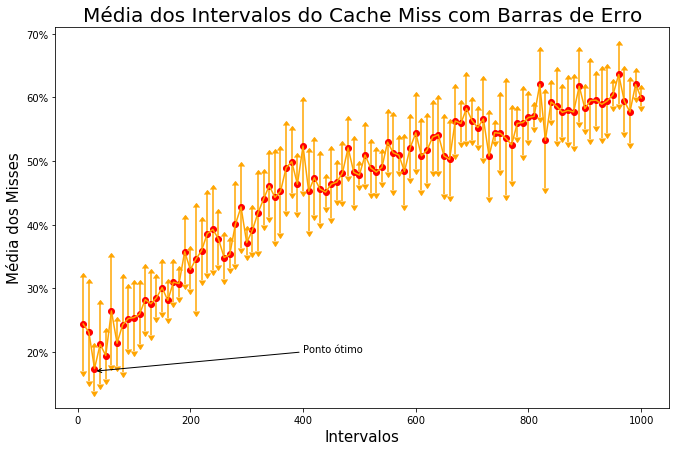

In [6]:
plt.rcParams['figure.figsize'] = (11,7)
plt.title('Média dos Intervalos do Cache Miss com Barras de Erro', fontsize=20)
plt.xlabel('Intervalos', fontsize=15)
plt.ylabel('Média dos Misses', fontsize=15)

plt.plot(intervalo_x ,misses_y, 'or')
plt.errorbar(intervalo_x,misses_y , erros,color = 'orange' ,uplims=True, lolims=True)

plt.annotate("Ponto ótimo", xy=(30, 17),xycoords='data',xytext=(400, 20),textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()